### Import the basic libraries

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 

### Load Data

In [2]:
df_train = pd.read_csv('mnist_train.csv')
df_test = pd.read_csv('mnist_test.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


In [5]:
X_train = df_train.drop(['label'], axis=1)
Y_train = df_train['label']

In [6]:
X_test = df_test.drop(['label'], axis=1)
Y_test = df_test['label']

In [7]:
# set one hot template on Ytrain from Y_train
arr = [0]*10
Ytrain = []
for i in range(60000):
    arr[Y_train[i]] = 1
    Ytrain.append(arr)
    arr = [0]*10

In [8]:
# set one hot template on Ytest from Y_test
arr = [0]*10
Ytest = []
for i in range(10000):
    arr[Y_train[i]] = 1
    Ytest.append(arr)
    arr = [0]*10

In [9]:
# ini yang akan digunakan nantinya untuk training 
Xtrain = np.array(X_train)
Ytrain = np.array(Ytrain)

In [10]:
# ini yang akan digunakan nantinya untuk testing
Xtest = np.array(X_test)
Ytest = np.array(Ytest)

### Create the model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# sebelumnya install dulu librarynya kaya dibawah lewat terminal
# pip install tensorflow

In [12]:
model = Sequential()

In [13]:
model.add(Dense(32, activation='relu', input_shape=(784, )))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
# train the model with 10 epochs
model.fit(x=Xtrain, y=Ytrain, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 6s 2ms/step - loss: 0.8216 - accuracy: 0.8045
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3192 - accuracy: 0.9157
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2418 - accuracy: 0.9324
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2066 - accuracy: 0.9406
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1820 - accuracy: 0.9477
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1645 - accuracy: 0.9520
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1507 - accuracy: 0.9577
Epoch 8/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1397 - accuracy: 0.9597
Epoch 9/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1356 - accuracy: 0.9609
Epoch 10/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.128

### Evaluate the model

In [16]:
loss, acc = model.evaluate(Xtrain, Ytrain)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0650 - accuracy: 0.9812


In [17]:
loss, acc = model.evaluate(Xtest, Ytest)

313/313 [==============================] - 1s 2ms/step - loss: 29.2152 - accuracy: 0.1012


In [18]:
def try_this(input_, title):
    a = input_.reshape(28, 28)
    plt.title(title)
    plt.imshow(a)

In [19]:
# [1 0 0 0 0 0 0 0 0 0] = angka 0
# [0 1 0 0 0 0 0 0 0 0] = angka 1
# [0 0 1 0 0 0 0 0 0 0] = angla 2
# ...dst

### Try the model

In [21]:
Xpred = np.round(model.predict(Xtest))

313/313 [==============================] - 1s 3ms/step


c:\Users\Alex\PythonProject\data-training\MNIST\.env\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


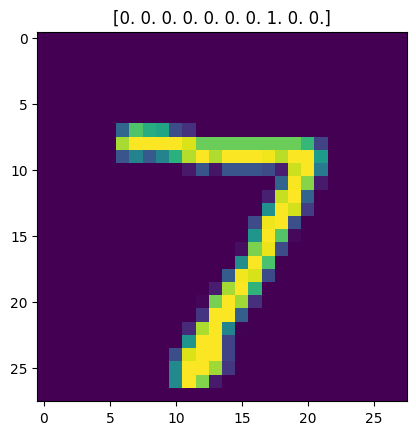

In [22]:
try_this(Xtest[0], Xpred[0])

c:\Users\Alex\PythonProject\data-training\MNIST\.env\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


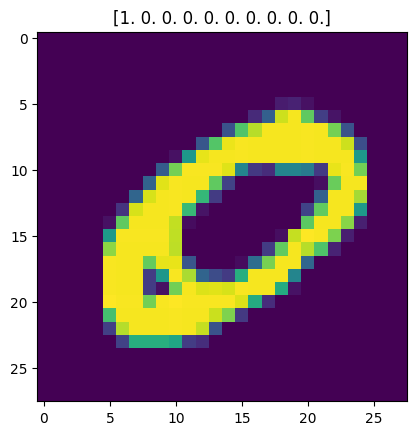

In [23]:
rd_idx = np.random.randint(10000)
try_this(Xtest[rd_idx], Xpred[rd_idx])